In [157]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Чтение данных**

In [158]:

data = pd.read_csv("./heart.csv")

In [159]:
#первые 5 строк нашего датасета
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [160]:
#Содержимое датасета
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

В своей работе рассматривается набор данных для прогнозирования сердечной недостаточности. Простыми словами сердечная недостаточность — это  синдром, при котором нарушена способность сердца перекачивать кровь.
Набор данных состоит из 918 строк (пациенты) и 12 столбцов (признаки, на основании которых делаем вывод есть сердечная недостаточность или она отсуствует).

Перечислим их:

Age - возраст пациента [years]

Sex - пол пациента [M: Male, F: Female]

ChestPainType - тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]

RestingBP - кровяное давление в состоянии покоя [mm Hg]

Cholesterol - сывороточный холестерин [mm/dl]

Fasting BS - уровень сахара в крови натощак [1: если уровень сахара в крови натощак > 120 mg/dl, 0: в противном случае]

RestingECG - результаты электрокардиограммы в покое [Normal: нормальный, ST: аномалия зубца ST-T, LVH: веероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

Max HR - достигнутая максимальная частота сердечных сокращений [числовое значение от 60 до 202]

Exercise Angina - стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

Old peak - пик нагрузки [ST]

ST_Slope - наклон сегмента ST пикового упражнения  [Up: восходящий уклон, Flat: плоский, Down: нисходящий уклон]

Heart Disease - есть ли сердечная недостаточность   [1: болезнь сердца, 0: норма]










In [161]:
#Всего 918 строк и 12 стобцов
print(data.shape)
#Отобразим список всех столбцов нашего набора данных
print(data.columns)

(918, 12)
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Посмотрим информацию по нашим столбцам.

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Посмотрим количество уникальных элементов.


In [163]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

**Визуализация данных и вычисление основных характеристик**

In [164]:
#Для удобства анализа осуществим отбор числовых колонок
#data_numerical = data.select_dtypes(include = [np.number])
num_cols = [cname for cname in data.columns if data[cname].dtype =='int' or data[cname].dtype =='float' ]
print(num_cols)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [165]:
#Также отделим нечисловые
#data_non_numeric = data.select_dtypes(exclude = [np.number])
cat_cols = [cname for cname in data.columns if data[cname].dtype =='object']
print(cat_cols)
type(cat_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


list

In [166]:
#Заменим тип 'object' на специальный, предназначенный для хранения категориальных значений:
for i in cat_cols:
  data[i] = data[i].astype('category')

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(1), int64(6)
memory usage: 55.5 KB


С помощью метода приведенного ниже для каждого количественного признака найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей.


In [168]:
data[num_cols].describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Тоже самое сделаем для категориальных признаков


In [169]:
data[cat_cols].describe(include=['category'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Построим несколько гистограмм, которые продемонстрируют нам количество каждого категориального признака.

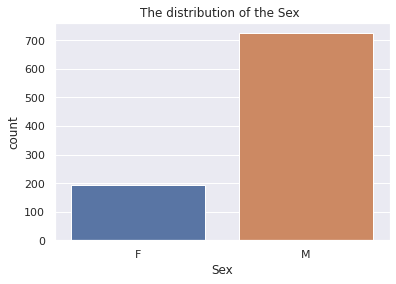

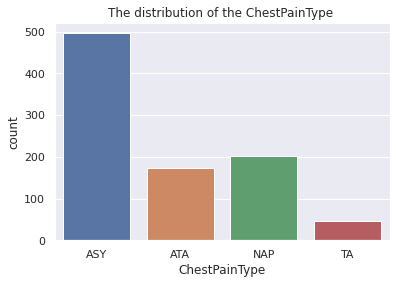

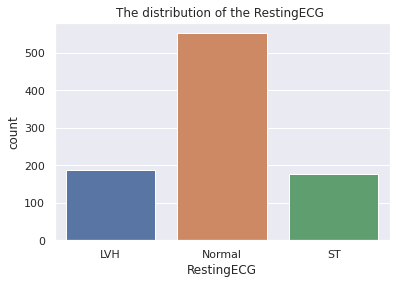

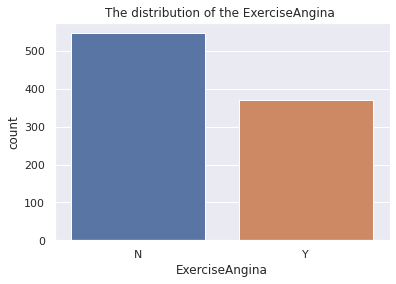

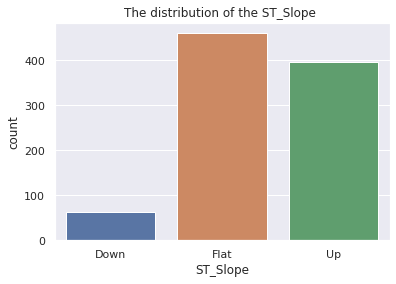

In [170]:
sns.set_theme(style = 'darkgrid')
for i in cat_cols: 
    sns.countplot(data = data, x = i)
    plt.title(f'The distribution of the {i} ')
    plt.show()

Из соответствующих графиков мы делаем выводы:

 1) Пациентов мужского пола на много больше, чем женского

 2) Основной тип боли в груди, который преобладает в нашей датасете - это бессимптомный (ASY), остальные встречаются реже

 3) Результаты кардиограммы в покое зачастую находятся в пределах нормы у большинства пациентов

 4) Стенокардии, вызванной физической нагрузкой, не подвержены более чем половина пациентов

 5) Наклон сегмента ST пикового упражнения наиболее часто является плоским или же имеет восходящий уклон.

Также для анализа  хотелось бы увидеть графики количества категориальных признаков, сгруппированных по переменной болезни сердца.

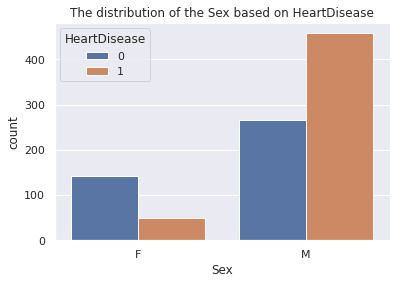

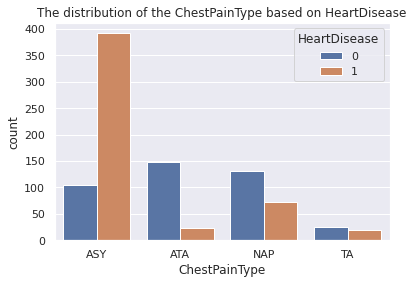

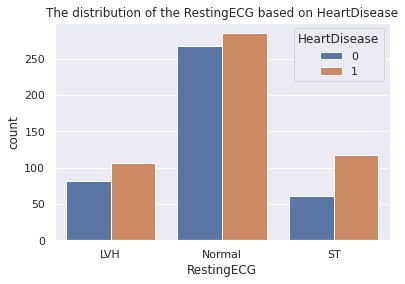

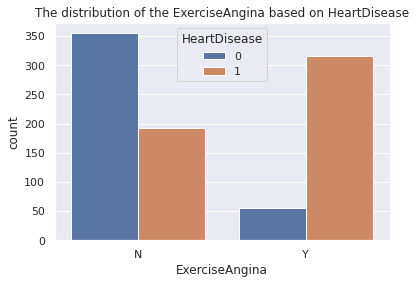

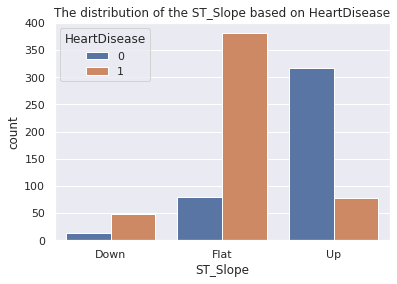

In [171]:
sns.set_theme(style = 'darkgrid')
for i in cat_cols: 
    sns.countplot(data = data, x = i, hue = 'HeartDisease')
    plt.title(f'The distribution of the {i} based on HeartDisease')
    plt.show()

Краткое резюме:
- Из первого графика мы видим, что середечная недостаточность преобладает у мужчин больше, чем у женщин.
- Пациенты, у которых не было боли в груди( проходило бессимптомно), на много чаще имели болезнь сердца,но наличие типичной стенокардии также указывало на это, хоть и в меньшей степени.
- Пациенты с нормальными результатами кардиограммы в покое 50/50 были подвержены сердечной недостаточности, а вот c аномалией зубца ST-T немного больше, чем LVH и Normal.
- У людей со стенокардией меньшинство имело норму, в отличии от пацентов без стенокардии.

Также поступим и для числовых признаков, построив несколько гистограмм:

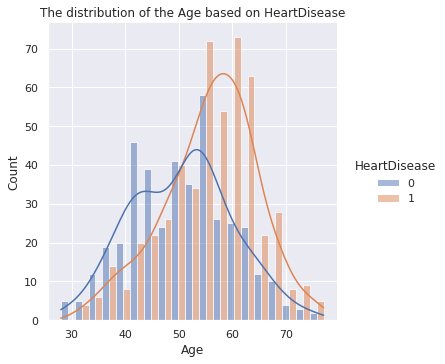

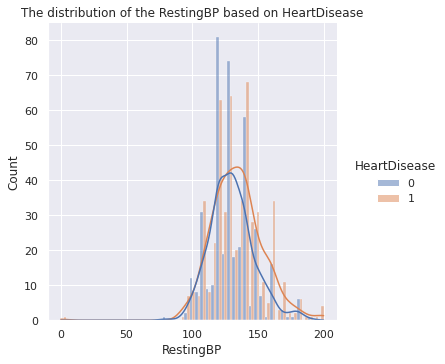

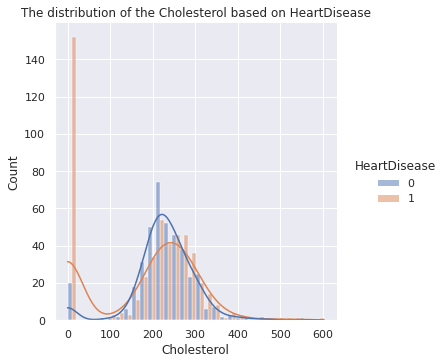

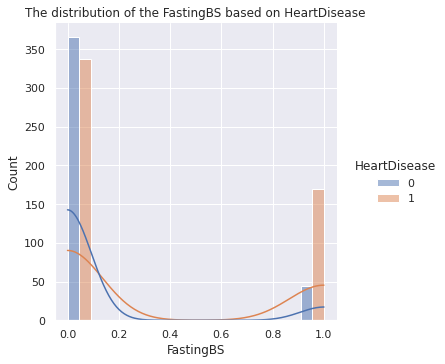

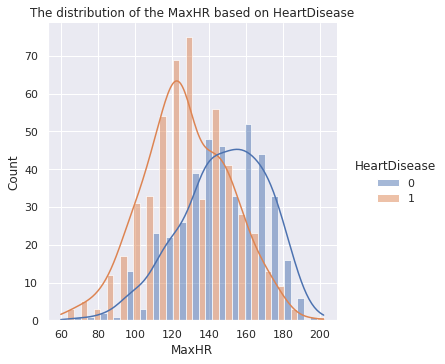

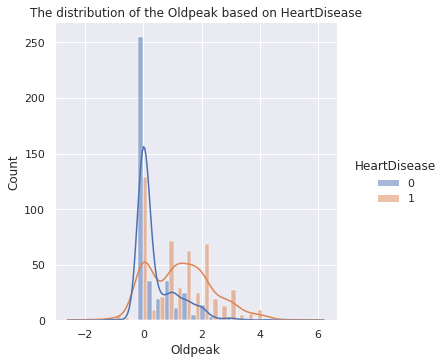

In [172]:
num_colss = num_cols[:-1]

sns.set_theme(style = 'darkgrid')
for i in num_colss:
            sns.displot(data = data, x = i,hue = 'HeartDisease', multiple='dodge', kde = True)
            plt.title(f'The distribution of the {i} based on HeartDisease')
            plt.show()

Матрицу корреляции рассмотрим чуть позже ( после обработки категориальных признаков)

**Обработка  пропущенных значений**

Посмотрим количество пропущенных значений в нашем наборе данных.

In [174]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Пропущенные значения отсутствуют.

**Обработка категориальных признаков**

Находим категориальные признаки и используем LabelEncoder для перевода в численные значения

In [175]:

from sklearn.preprocessing import LabelEncoder

data_new = data.copy()
encoder = LabelEncoder()

for i in cat_cols:
  data_new[i] = encoder.fit_transform(data_new[i])



In [176]:
data_new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [177]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Теперь мы можем построить матрицу корреляции

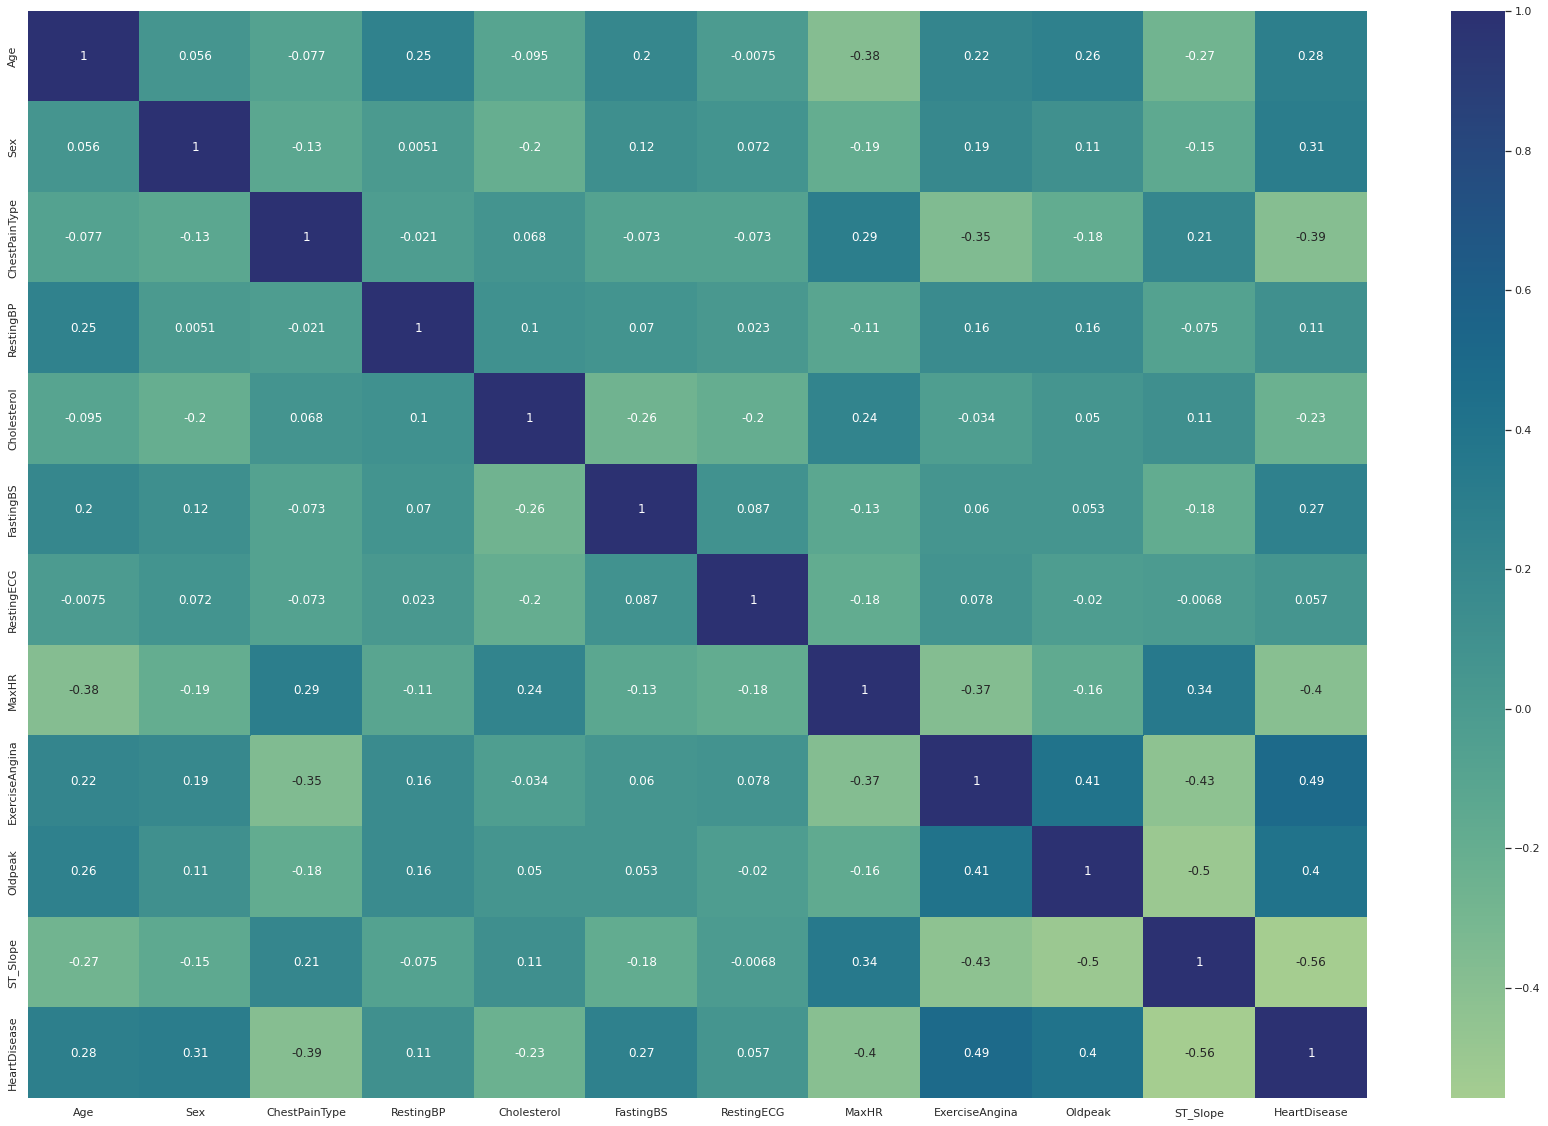

In [179]:
mask = np.zeros_like(data_new.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(data_new.corr(), annot = True, cmap = 'crest')

Некоторые виды коэффициентов корреляции могут быть положительными или отрицательными.Отрицательная корреляция — корреляция, при которой увеличение одной переменной связано с уменьшением другой. 

В данной работе наиболее сильная положительная корреляция (0.49) наблюдается между HeartDisease ( наличие сердечной недостаточности ) и ExerciseAngina ( наличие стенокардии, вызванной физической нагрузкой).
Наиболее сильная отрицательная корреляция ( -0.56) между HeartDisease ( наличие сердечной недостаточности ) и ST_Slope (наклон сегмента ST ), а также (-0.5) между  ST_Slope (наклон сегмента ST)   и  Oldpeak (пик нагрузки).

**Наличие выбросов**

Числовые признаки:


In [181]:
for i in data_new.columns:
  print(data_new[i].value_counts())



54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
1    725
0    193
Name: Sex, dtype: int64
0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
1    552
0    188
2    178
Name: Rest

**Нормализация признаков с помощью линейного преобразования:**



In [182]:
data_normal = (data_new - data_new.min(axis=0)) / (data_new.max(axis=0) - data_new.min(axis=0))
data_normal.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.260349,0.661983,0.329684,0.233115,0.494553,0.540911,0.404139,0.396291,0.680828,0.553377
std,0.192502,0.407701,0.318840,0.092571,0.181400,0.423046,0.315836,0.179298,0.490992,0.121201,0.303528,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.000000,0.600000,0.287313,0.000000,0.500000,0.422535,0.000000,0.295455,0.500000,0.000000
50%,0.530612,1.000000,0.000000,0.650000,0.369818,0.000000,0.500000,0.549296,0.000000,0.363636,0.500000,1.000000
75%,0.653061,1.000000,0.666667,0.700000,0.442786,0.000000,0.500000,0.676056,1.000000,0.465909,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Разбиение данных на обучающую и тестовую выборки**

In [183]:
from sklearn.model_selection import train_test_split

X = data_normal.drop('HeartDisease', axis = 1)
y = data_normal['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

Создадим функцию для удобного подбора параметров

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
def cv_params(model, param_grid):
  scoring = 'neg_mean_absolute_error'
  opt_params = GridSearchCV(
      estimator = model, # модель
      param_grid = param_grid, # параметры
      scoring = scoring, # стратегия валидаци
      cv = 5,#количество слоев кросс - валидации
      #verbose = 10 
      n_jobs = -1 ) #количество потоков для обучения , -1 = все
  opt_params.fit(X_train,y_train)
  params = opt_params.best_params_
  best_score = opt_params.best_score_

  print(f'Best score:{round(-best_score,2)}')
  print(f'Best parameters:{params}\n')

  return params
  

Параметры для KNeighborsClassifier

In [197]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score
knn_param_grid = {
    'n_neighbors': np.arange(1,30), 
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
    
}
knn_clean = KNeighborsClassifier()
knn_params = cv_params(knn_clean,knn_param_grid)

Best score:0.13
Best parameters:{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}



Параметры для RandomForestClassifier

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'max_depth':[20,25,30,35,40],
    'n_estimators':[400,600,800]
}
rf_clean = RandomForestClassifier()
rf_params = cv_params(rf_clean,rf_param_grid)

Best score:0.13
Best parameters:{'max_depth': 40, 'n_estimators': 800}



Параметры для LGBMClassifier

In [199]:
import lightgbm
lgb_param_grid = {
    'max_depth':[4,10,15,20],
    'num_leaves':[25,25,45],
    'n_estimators':[41,100,250,500,600]
}
lgb_clean =lightgbm.LGBMClassifier(random_state=1)
lgb_params = cv_params(lgb_clean,lgb_param_grid)

Best score:0.13
Best parameters:{'max_depth': 4, 'n_estimators': 100, 'num_leaves': 25}



Теперь нам известны параметры, на которых модели дают наилучший результат. Обучим модели на этих параметрах, посмотрим MAPE и замерим время.

In [227]:
import time
#knn
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
MAPE_1_train = mean_absolute_percentage_error(y_train,pred_knn_train)
MAE_1_train = mean_absolute_error(y_train,pred_knn_train)
MAPE_1_test = mean_absolute_percentage_error(y_test,pred_knn)
MAE_1_test = mean_absolute_error(y_test,pred_knn)

end_time = time.time()
runtime = end_time - start_time
print(f'MAPE_train:{round(MAPE_1_train*100,2)}  %')
print(f'MAPE_test:{round(MAPE_1_test*100,2)}  %')
print(f'MAE_train:{round(MAE_1_train,2)}')
print(f'MAE_test:{round(MAE_1_test,2)}')

print('Runtime = ', runtime)


MAPE_train:0.0  %
MAPE_test:2.2028476438225252e+16  %
MAE_train:0.0
MAE_test:0.09
Runtime =  0.07365298271179199


Из результатов заметно, что на обучающей выборке ошибки отсутствуют, а на тетовой MAPE = 2.2%, а MAE = 0.09

In [228]:
#rf
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train,y_train)
start_time = time.time()
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
MAPE_2_test = mean_absolute_percentage_error(y_test,pred_rf)
MAE_2_test = mean_absolute_error(y_test,pred_rf)
MAPE_2_train = mean_absolute_percentage_error(y_train,pred_rf_train)
MAE_2_train = mean_absolute_error(y_train,pred_rf_train)
end_time = time.time()
runtime = end_time - start_time
print(f'MAPE_train:{round(MAPE_2_train*100,2)}  %')
print(f'MAPE_test:{round(MAPE_2_test*100,2)}  %')
print(f'MAE_train:{round(MAE_2_train,2)}')
print(f'MAE_test:{round(MAE_2_test,2)}')
print('Runtime = ', runtime)

MAPE_train:0.0  %
MAPE_test:2.2028476438225256e+16  %
MAE_train:0.0
MAE_test:0.11
Runtime =  0.30609726905822754


In [233]:
#lgb
lgb = lightgbm.LGBMClassifier(**lgb_params)
lgb.fit(X_train,y_train)
start_time = time.time()
pred_lgb = lgb.predict(X_test)
pred_lgb_train = lgb.predict(X_train)
MAPE_3_test = mean_absolute_percentage_error(y_test,pred_lgb)
MAE_3_test = mean_absolute_error(y_test,pred_lgb)
MAPE_3_train = mean_absolute_percentage_error(y_train, pred_lgb_train)
MAE_3_train = mean_absolute_error(y_train,pred_lgb_train)
end_time = time.time()
runtime = end_time - start_time
print(f'MAPE_test:{round(MAPE_3_test*100,2)}  %')
print(f'MAE_train:{round(MAE_3_train,2)}')
print(f'MAE_test:{round(MAE_3_test,2)}')
print('Runtime = ', runtime)

MAPE_test:2.2028476438225256e+16  %
MAE_train:0.04
MAE_test:0.11
Runtime =  0.009807825088500977


Дополнительно реализовав некоторые алгоритмы, мы видим, что работают они однаково хорошо, но по времени проигрывают LGBMClassifier

**Выводы**

В рамках данного домашнего задания была рассмотрена задача классификации наличия сердечной недостаточности на основании различных признаков. 

При обучении алгоритмом knn лучший результат достигается при следующих параметрах:

 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'.
 
На обучающей выборке ошибка равна 0, а на тестовой MAE = 0.09, a MAPE = 2.2%. Это достаточно хорошие результаты. Также стоит заметить, что есть алгоритмы, которые работают лучше чем KNN.  Быстрее всего работает LGBMClassifier.

Подводя итог, делаем вывод, что предобработка данных и их анализ были выполнены успешно, что и дало такой хороший результат.
